In [1]:
import h5py
import math
import matplotlib.pyplot as plt
import numpy as np
import pyfftw as ft
import time

In [2]:
N = 1024

In [3]:
w2 = ft.zeros_aligned((N,N,N), dtype='float32')
chi = ft.zeros_aligned((N,N,N), dtype='float32')

In [4]:
wiz = (b'(fftw-3.3.4 fftw_wisdom #x41ad5c95 #x159437f1 #x23fdee71 #xc6cf4464\n)\n', b'(fftw-3.3.4 fftwf_wisdom #xa84d9475 #xdb220970 #x4aa6f1c4 #xf3163254\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xe0177557 #xe9f32997 #xfb2dcb2c #xf8f70860)\n  (fftwf_dft_buffered_register 0 #x10bdd #x10bdd #x0 #x3eeb1978 #x428183dc #x2a84fbfa #xe4361ea0)\n  (fftwf_codelet_hc2cb_8 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x68ff47a8 #x21bb9e5b #xa20dc9bd #xd2485c0c)\n  (fftwf_codelet_r2cb_8 2 #x10bdd #x10bdd #x0 #x669a3813 #x9ba2bb21 #x64e8656d #x87c9de00)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x9c0e3f58 #x928ea026 #xd28229a3 #x7246e0ac)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #xee87b2d5 #x3e497607 #xfff1907f #xf9579a39)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x8676a7b7 #xe006c70d #x487b0278 #xb2f8f002)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x675249aa #x037557b8 #x14643a4b #x9ea626ef)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x33c540f7 #x7207139c #x75ca3a4c #x748bc1b6)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x1e5fa302 #x4dca4b4b #x68854fe7 #x57f745da)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x129e3b9a #xbe5c8c09 #x84314e36 #x92c09d6d)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #xc7a8d0be #x7798b669 #x9437b479 #x2ba791fc)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2b2a182d #x1a4f0eb8 #x4051bfc8 #x50ede16d)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x09558463 #xdea41841 #xf014e84a #x343a12e5)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xf6040783 #x4ecac406 #x61d1e470 #xc372144f)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x37c7ab24 #x6b6a7433 #xbb43af76 #x9bd7720f)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xb5f6482a #x970cff75 #xad1e3938 #x526a74d7)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x54bf9035 #xa469d859 #x8c3af79c #xaabf7edf)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #x4c6eda6a #xd64bb98a #xdeff4d47 #xbd9bc277)\n  (fftwf_rdft_rank0_register 2 #x11bdd #x11bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x914f085b #x7945eab1 #xb24b3509 #x41ff886a)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x2d58151a #x7bf279ac #xd05075c9 #x05025c02)\n  (fftwf_codelet_hc2cf_8 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #x6e3f6b00 #xc631065b #xc5ce0991 #xc9e5830a)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #xbf36f96d #xc5099024 #xab4588dd #x0f71c101)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x2fdf6c57 #xa3a423cb #x3c83b16e #xd62995da)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #xee00c037 #x8d699089 #xad7ad6a0 #x4efaaf7d)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_rdft_rank0_register 2 #x10bdd #x10bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_codelet_r2cb_128 0 #x10bdd #x10bdd #x0 #x673294cd #xe5b085a3 #xb8a774bf #xfd19dfb2)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x3c666628 #x01043fe7 #x20ba9e85 #x1f9b67a1)\n  (fftwf_codelet_r2cbIII_8 2 #x10bdd #x10bdd #x0 #xfb67696a #x19d836b7 #x6b24c329 #xe4fc2e8b)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x1913d4ac #xf2d50866 #xc504d3dd #x76d5edcd)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x411f7a68 #x161cf1d6 #xbec2d98e #x7d9fdffa)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x23eb177d #x111d2c06 #xa78f35fb #xd56dcd76)\n)\n', b'(fftw-3.3.4 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')

In [5]:
ft.import_wisdom(wiz)

(True, True, True)

In [6]:
fo = ft.zeros_aligned((N,N,N), dtype='float32')

In [7]:
bo = ft.zeros_aligned((N,N,N//2+1), dtype='complex64')

In [8]:
start = time.time()

fft_object = ft.FFTW(fo,bo,axes=(0,1,2), direction='FFTW_FORWARD', flags=('FFTW_MEASURE', ),threads=8)

end = time.time()
print(end-start)

0.0164337158203125


In [9]:
start = time.time()

ifft_object = ft.FFTW(bo,fo,axes=(0,1,2), direction='FFTW_BACKWARD', flags=('FFTW_MEASURE', ),threads=8)

end = time.time()
print(end-start)

0.015555620193481445


In [10]:
folder = '/home/idies/workspace/scratch'

nproc = 8
nx = N//nproc

lw2 = ft.zeros_aligned((N//nproc,N,N), dtype='float32')
folder = '/home/idies/workspace/scratch'

for k in range(nproc):
    filename = 'ref-enstrophy-'+str(k)+'.npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    if(int(content['nproc'])!=nproc):
        print("Unmatched number of processes. Must first pre-process to adequate number of process")
    
    lw2[:,:,:] = content['w2']
    w2[k*nx:(k+1)*nx,:,:] = lw2[:,:,:]

In [11]:
avgOmega = np.average(w2)
print("Average enstrophy = "+str(0.5*avgOmega))

Average enstrophy = 249.218414307


In [12]:
t=5
chi[:,:,:] = 0.
chi[w2 > t*avgOmega] = 1.

In [13]:
start = time.time()

dims = []

Boxes = [8,16,32,64,128]

for Nb in Boxes:
    chksz = (N//Nb)
    rem = N - Nb*chksz
    begin = []
    end = []
    sz = 0
    
    if rem > 0:
        sz = Nb+1
        for k in range(Nb):
            begin.append(k*chksz)
            end.append((k+1)*chksz)
        begin.append(Nb*chksz)
        end.append(N)
    else:
        sz = Nb
        for k in range(Nb):
            begin.append(k*chksz)
            end.append((k+1)*chksz)
    
    boxnum = 0
    for i in range(sz):
        for j in range(sz):
            for k in range(sz):
                shr = np.average(chi[begin[i]:end[i],begin[j]:end[j],begin[k]:end[k]])
                boxnum += math.ceil(shr)
                
    dims.append(boxnum)
    
print(dims)

end = time.time()
print(end-start)

[512, 4093, 31360, 193017, 853922]
136.6120903491974


[ 128.   64.   32.   16.    8.]
[ -2.14537637  18.11877989]


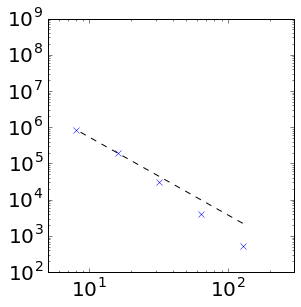

In [14]:
import matplotlib
import matplotlib.pyplot as plt

dims = np.array(dims,dtype='float32')
Boxes = np.array(Boxes,dtype='float32')
rm1 = 1024/Boxes
print(rm1)
    
plt.figure(figsize=(15,10))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
    
box = np.array(dims,dtype='int64')
        
logrm1 = np.log(rm1)
logbox = np.log(box)
        
ax = plt.subplot(2,3,1)
plt.xlim([5,3*10**(2)])
plt.ylim([10**2,10**9])
    
fit = np.polyfit(logrm1[rm1<1/0.04],logbox[rm1<1/0.04],1)
print(fit)
    
plt.loglog(rm1,box,'x')
plt.loglog(rm1,np.exp(fit[1])*(rm1**(fit[0])),'k--')

In [15]:
start = time.time()

dims = []

Boxes1 = [8,12,16,20,24,32,38,42,50,56,64,70,80,86,90,95,100,105,110,115,120,128,135,150,160,170,185]

for Nb in Boxes1:
    chksz = (N//Nb)
    rem = N - Nb*chksz
    begin = []
    end = []
    sz = 0
    
    print("L = "+str(chksz))
    
    if rem > 0:
        sz = Nb+1
        for k in range(Nb):
            begin.append(k*chksz)
            end.append((k+1)*chksz)
        begin.append(Nb*chksz)
        end.append(N)
    else:
        sz = Nb
        for k in range(Nb):
            begin.append(k*chksz)
            end.append((k+1)*chksz)
    
    boxnum = 0
    for i in range(sz):
        for j in range(sz):
            for k in range(sz):
                shr = np.average(chi[begin[i]:end[i],begin[j]:end[j],begin[k]:end[k]])
                boxnum += math.ceil(shr)
                
    dims.append(boxnum)
    
print(dims)
dims = np.array(dims,dtype='float32')

end = time.time()
print(end-start)

L = 128
L = 85
L = 64
L = 51
L = 42
L = 32
L = 26
L = 24
L = 20
L = 18
L = 16
L = 14
L = 12
L = 11
L = 11
L = 10
L = 10
L = 9
L = 9
L = 8
L = 8
L = 8
L = 7
L = 6
L = 6
L = 6
L = 5
[512, 2191, 4093, 9146, 15372, 31360, 54347, 70613, 110381, 145640, 193017, 244064, 324741, 376141, 424158, 463394, 529383, 565125, 638445, 662157, 743469, 853922, 920264, 1068671, 1277469, 1474073, 1608244]
1847.096004486084


In [22]:
 
start = time.time()

dims = dims.tolist()
Boxes2 = [200,215,230,256,270,285,290,300,320,350,384,400,420,450,470,500,512]

for Nb in Boxes2:
    chksz = (N//Nb)
    rem = N - Nb*chksz
    begin = []
    end = []
    sz = 0
    
    print("L = "+str(chksz))
    
    if rem > 0:
        sz = Nb+1
        for k in range(Nb):
            begin.append(k*chksz)
            end.append((k+1)*chksz)
        begin.append(Nb*chksz)
        end.append(N)
    else:
        sz = Nb
        for k in range(Nb):
            begin.append(k*chksz)
            end.append((k+1)*chksz)
    
    boxnum = 0
    for i in range(sz):
        for j in range(sz):
            for k in range(sz):
                shr = np.average(chi[begin[i]:end[i],begin[j]:end[j],begin[k]:end[k]])
                boxnum += math.ceil(shr)
                
    dims.append(boxnum)
    
print(dims)
dims = np.array(dims,dtype='float32')

end = time.time()
print(end-start)

L = 5
L = 4
L = 4
L = 4
L = 3
L = 3
L = 3
L = 3
L = 3
L = 2
L = 2
L = 2
L = 2
L = 2
L = 2
L = 2
L = 2
[512.0, 2191.0, 4093.0, 9146.0, 15372.0, 31360.0, 54347.0, 70613.0, 110381.0, 145640.0, 193017.0, 244064.0, 324741.0, 376141.0, 424158.0, 463394.0, 529383.0, 565125.0, 638445.0, 662157.0, 743469.0, 853922.0, 920264.0, 1068671.0, 1277469.0, 1474073.0, 1608244.0, 1962050, 1927768, 2355642, 3032672, 2644662, 3138279, 3312860, 3663518, 4362460, 3457594, 4606195, 5234887, 6091408, 7505133, 8468783, 9827760, 10284400]
40019.93015956879


[ 128.           85.33333588   64.           51.20000076   42.66666794
   32.           26.94736862   24.38095284   20.47999954   18.2857151    16.
   14.62857151   12.80000019   11.9069767    11.37777805   10.77894783
   10.23999977    9.75238132    9.30909061    8.90434742    8.53333378
    8.            7.58518505    6.82666683    6.4000001     6.02352953
    5.53513527    5.11999989    4.76279068    4.45217371    4.
    3.79259253    3.59298253    3.53103447    3.41333342    3.20000005
    2.92571425    2.66666675    2.55999994    2.43809533    2.27555561
    2.17872334    2.0480001     2.        ]
[ -1.84437148  17.36907386]


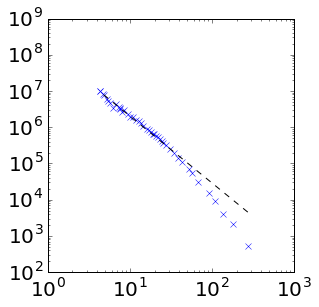

In [29]:
import matplotlib
import matplotlib.pyplot as plt

eta = 0.00287
dx = 2*np.pi/N

#Boxes2 = []
Boxes = Boxes1+Boxes2


fdims = np.array(dims,dtype='float32')
fBoxes = np.array(Boxes,dtype='float32')
rm1 = 1024/fBoxes
print(rm1)
    
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.figure(figsize=(15,10))
plt.xlabel(r'$r/\eta$',size=20)
plt.ylabel(r'$N_r$',size=20)
    
box = np.array(fdims,dtype='int64')
        
logrm1 = np.log(rm1)
logbox = np.log(box)
        
ax = plt.subplot(2,3,1)
#plt.xlim([5,3*10**(2)])
plt.ylim([10**2,10**9])
    
fit = np.polyfit(logrm1[rm1<1/0.04],logbox[rm1<1/0.04],1)
print(fit)
    
plt.loglog(rm1*dx/eta,box,'x')
plt.loglog(rm1*dx/eta,np.exp(fit[1])*(rm1**(fit[0])),'k--')

[ 128.           85.33333588   64.           51.20000076   42.66666794
   32.           26.94736862   24.38095284   20.47999954   18.2857151    16.
   14.62857151   12.80000019   11.9069767    11.37777805   10.77894783
   10.23999977    9.75238132    9.30909061    8.90434742    8.53333378
    8.            7.58518505    6.82666683    6.4000001     6.02352953
    5.53513527    5.11999989    4.76279068    4.45217371    4.
    3.79259253    3.59298253    3.53103447    3.41333342    3.20000005
    2.92571425    2.66666675    2.55999994    2.43809533    2.27555561
    2.17872334    2.0480001     2.        ]


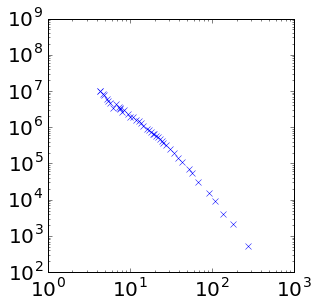

In [30]:
import matplotlib
import matplotlib.pyplot as plt

eta = 0.00287
dx = 2*np.pi/N

#Boxes2 = []
Boxes = Boxes1+Boxes2


fdims = np.array(dims,dtype='float32')
fBoxes = np.array(Boxes,dtype='float32')
rm1 = 1024/fBoxes
print(rm1)
    
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.figure(figsize=(15,10))
plt.xlabel(r'$r/\eta$',size=20)
plt.ylabel(r'$N_r$',size=20)
    
box = np.array(fdims,dtype='int64')
        
logrm1 = np.log(rm1)
logbox = np.log(box)
        
ax = plt.subplot(2,3,1)
#plt.xlim([5,3*10**(2)])
plt.ylim([10**2,10**9])
    
#fit = np.polyfit(logrm1[rm1<1/0.04],logbox[rm1<1/0.04],1)
#print(fit)
    
plt.loglog(rm1*dx/eta,box,'x')
#plt.loglog(rm1*dx/eta,np.exp(fit[1])*(rm1**(fit[0])),'k--')